In [1]:
import pandas as pd
from datetime import date, timedelta

In [79]:
#pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 50)

# Downloading Original Data
Use below for a dataset that you download from the MTA site

In [66]:
#read in last thirteen weeks
file_200111 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200111.txt')
file_200118 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200118.txt')
file_200125 =pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200125.txt')
file_200201 =pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200201.txt')
file_200208 =pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200208.txt')
file_200215 =pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200215.txt')
file_200222 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200222.txt')
file_200229 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200229.txt')
file_200307 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200307.txt')
file_200314 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200314.txt')
file_200321 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200321.txt')
file_200328 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200328.txt')
file_200404 = pd.read_csv ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200404.txt')

In [67]:
#concat all 13 pd df and sort so that each turnstile is together in time order
fileList = [file_200111, file_200118, file_200125, file_200201, file_200208, file_200215, file_200222, file_200229, file_200307, file_200314, file_200321, file_200328, file_200404]
full_file = pd.concat(fileList)
full_file.sort_values(by=['C/A', "UNIT", "SCP", "DATE", "TIME"], inplace=True)

In [73]:
#rename Exits to remove spacing
full_file.rename(columns={'EXITS                                                               ': "EXITS"}, inplace=True)

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [74]:
# calculate the differences in entries and exits over time
p_ent_val = []
p_ext_val = []
previous_SCP = 0
previous_entries = 0
previous_exits = 0
for index, row in full_file.iterrows():
    if row['SCP'] == previous_SCP:
        ent_diff = row['ENTRIES']-previous_entries
        ext_diff = row['EXITS']-previous_exits
        if ent_diff < 0: 
            ent_diff = 0 
        if ext_diff < 0: 
            ext_diff = 0
        p_ent_val.append(row['ENTRIES']-previous_entries)
        p_ext_val.append(row['EXITS']-previous_exits)
    else: 
        p_ent_val.append(0)
        p_ext_val.append(0)
        previous_SCP = row['SCP']
    previous_entries = row['ENTRIES']
    previous_exits = row['EXITS']
#add these values to the dataframe
full_file['ent_diff'] = p_ent_val 
full_file['ext_diff'] = p_ext_val


In [81]:
belowzero = full_file[full_file["ent_diff"]>1000000]
print(belowzero)

         C/A  UNIT       SCP          STATION  LINENAME DIVISION        DATE  \
3345    A025  R023  01-00-00  34 ST-HERALD SQ  BDFMNQRW      BMT  03/04/2020   
3387    A025  R023  01-00-01  34 ST-HERALD SQ  BDFMNQRW      BMT  03/04/2020   
3429    A025  R023  01-00-02  34 ST-HERALD SQ  BDFMNQRW      BMT  03/04/2020   
3639    A025  R023  01-06-00  34 ST-HERALD SQ  BDFMNQRW      BMT  03/04/2020   
3682    A025  R023  01-06-01  34 ST-HERALD SQ  BDFMNQRW      BMT  03/04/2020   
18409   B028  R136  01-00-00   SHEEPSHEAD BAY        BQ      BMT  01/28/2020   
30584   H001  R175  00-00-00             8 AV      ACEL      BMT  03/11/2020   
30867   H001  R175  00-00-02             8 AV      ACEL      BMT  02/01/2020   
32401   H009  R235  00-03-00       BEDFORD AV         L      BMT  03/22/2020   
32479   H009  R235  00-03-02       BEDFORD AV         L      BMT  03/21/2020   
38869   J007  R377  00-03-00      FLUSHING AV        JM      BMT  01/09/2020   
50595   N056  R188  01-00-03            

In [75]:
#write dataframe to csv 
full_file.to_csv('turnstile_full.csv')

# Downloading created dataset
Use for csv created from the MTA.txt

In [175]:
#read in earlier compiled csv
turnstile_data = pd.read_csv('turnstile_full.csv')

In [205]:
#remove negative values that i didnt do in the original 13 week scrape
turnstile_data = turnstile_data[turnstile_data["ent_diff"]>0]
turnstile_data = turnstile_data[turnstile_data["ext_diff"]>0]

#remove extremly high values (when it didnt log for several hours --> )
turnstile_data = turnstile_data[turnstile_data["ent_diff"]<5000]
turnstile_data = turnstile_data[turnstile_data["ext_diff"]<5000]

In [216]:
turnstile_data

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,ent_diff,ext_diff
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/04/2020,07:00:00,REGULAR,7331224,2484861,11,12
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/04/2020,11:00:00,REGULAR,7331281,2484936,57,75
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/04/2020,15:00:00,REGULAR,7331454,2485014,173,78
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/04/2020,19:00:00,REGULAR,7331759,2485106,305,92
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/04/2020,23:00:00,REGULAR,7331951,2485166,192,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675707,205575,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/02/2020,21:00:00,REGULAR,3131893,396374,3,3
2675708,205576,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/03/2020,01:00:00,REGULAR,3131896,396380,3,6
2675710,205578,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/03/2020,09:00:00,REGULAR,3131897,396382,1,1
2675711,205579,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/03/2020,13:00:00,REGULAR,3131899,396385,2,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dfe1ed0>]],
      dtype=object)

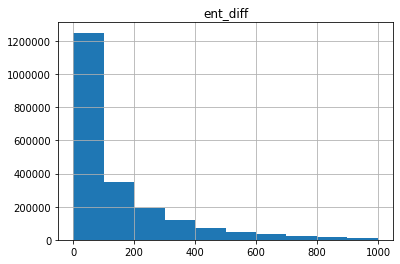

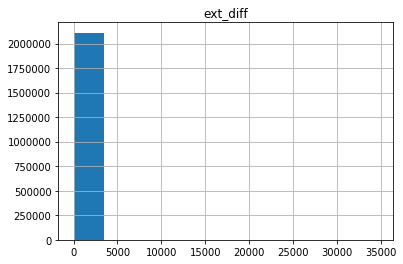

In [208]:
e.hist(column="ent_diff")
e.hist(column="ext_diff")

In [217]:
#delete unnecessary columns
del turnstile_data['ENTRIES']
del turnstile_data['EXITS']
del turnstile_data['DESC']
del turnstile_data["Unnamed: 0"]
del turnstile_data["DIVISION"]

In [218]:
#group data by C/A, Date, Time - sum the ent/ext
df = turnstile_data
del df['SCP']
df.groupby(["C/A", "DATE", "TIME"]).agg(
    {"ent_diff": "sum", 
     "ext_diff": "sum", 
     "STATION": "first", 
     "LINENAME": "first", 
     "UNIT": "first"
    })                                                

ent_diff  ext_diff        STATION LINENAME  UNIT
C/A   DATE       TIME                                                      
A002  01/04/2020 07:00:00       100       246          59 ST  NQR456W  R051
                 11:00:00       708      1343          59 ST  NQR456W  R051
                 15:00:00      1902      1655          59 ST  NQR456W  R051
                 19:00:00      2951      1856          59 ST  NQR456W  R051
                 23:00:00      2229      1108          59 ST  NQR456W  R051
...                             ...       ...            ...      ...   ...
TRAM2 04/03/2020 01:00:00        17         7  RIT-ROOSEVELT        R  R469
                 09:00:00        85         7  RIT-ROOSEVELT        R  R469
                 13:00:00       101        18  RIT-ROOSEVELT        R  R469
                 17:00:00        47         4  RIT-ROOSEVELT        R  R469
                 21:00:00        46         9  RIT-ROOSEVELT        R  R469

[498243 rows x 5 columns]

In [219]:
#check to see if the above grouping actually worked and made sense
var = turnstile_data[turnstile_data['C/A'] == "TRAM2"]
var = var[var["DATE"] == "04/03/2020"]
print(var)

           C/A  UNIT        STATION LINENAME        DATE      TIME  ent_diff  \
2674072  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  09:00:00        41   
2674073  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  13:00:00        50   
2674074  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  17:00:00        42   
2674075  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  21:00:00        21   
2674616  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  01:00:00        14   
...        ...   ...            ...      ...         ...       ...       ...   
2675167  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  21:00:00         1   
2675708  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  01:00:00         3   
2675710  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  09:00:00         1   
2675711  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  13:00:00         2   
2675713  TRAM2  R469  RIT-ROOSEVELT        R  04/03/2020  21:00:00         1   

         ext_diff  
2674072         3  

In [220]:
#read in file for lat/long, add in column names
geo_encoding = pd.read_csv("https://raw.githubusercontent.com/chriswhong/nycturnstiles/master/geocoded.csv", names=["UNIT","C/A", "STATION", "LINENAME", "DIVISION", "LAT", "LONG"])
geo_encoding

,UNIT,C/A,STATION,LINENAME,DIVISION,LAT,LONG
0,R470,X002,ELTINGVILLE PK,Z,SRT,40.544600,-74.164581
1,R544,PTH02,HARRISON,1,PTH,40.738879,-74.155533
2,R165,S102,TOMPKINSVILLE,1,SRT,40.636948,-74.074824
3,R070,S101,ST. GEORGE,1,SRT,40.643738,-74.073622
4,R070,S101A,ST. GEORGE,1,SRT,40.643738,-74.073622
...,...,...,...,...,...,...,...
763,R549,PTH18,NEWARK BM BW,1,PTH,NaN,NaN
764,R549,PTH19,NEWARK C,1,PTH,NaN,NaN
765,R549,PTH20,NEWARK HM HE,1,PTH,NaN,NaN
766,R550,PTH07,CITY / BUS,1,PTH,NaN,NaN


In [221]:
#left inner join - i believe
result = turnstile_data.merge(geo_encoding, on=["C/A", "UNIT"], how="inner")

In [222]:
#check for where there are not location points
guess = result[result['LAT'].isnull()]
ls_nulls = pd.unique(guess['UNIT'])
print(guess)

           C/A  UNIT        STATION_x LINENAME_x        DATE      TIME  \
1152870  PTH01  R549  NEWARK HW BMEBE          1  01/04/2020  09:00:00   
1152871  PTH01  R549  NEWARK HW BMEBE          1  01/04/2020  13:12:00   
1152872  PTH01  R549  NEWARK HW BMEBE          1  01/04/2020  17:24:00   
1152873  PTH01  R549  NEWARK HW BMEBE          1  01/04/2020  21:36:00   
1152874  PTH01  R549  NEWARK HW BMEBE          1  01/05/2020  01:48:00   
...        ...   ...              ...        ...         ...       ...   
1249999  PTH20  R549     NEWARK HM HE          1  03/10/2020  14:35:37   
1250000  PTH20  R549     NEWARK HM HE          1  03/12/2020  12:47:37   
1250001  PTH20  R549     NEWARK HM HE          1  03/12/2020  16:59:37   
1250002  PTH20  R549     NEWARK HM HE          1  03/16/2020  13:23:37   
1250003  PTH20  R549     NEWARK HM HE          1  03/16/2020  17:35:37   

         ent_diff  ext_diff        STATION_y LINENAME_y DIVISION  LAT  LONG  
1152870         7        15  NEWA

In [223]:
#figured out what the location points are --> believe they're all the PATH line
for val in ls_nulls: 
    print("value checking: " + val)
    print(geo_encoding[geo_encoding['UNIT'] == val])
    #print(result[result['UNIT'] == val])

value checking: R549
     UNIT    C/A          STATION LINENAME DIVISION  LAT  LONG
762  R549  PTH01  NEWARK HW BMEBE        1      PTH  NaN   NaN
763  R549  PTH18     NEWARK BM BW        1      PTH  NaN   NaN
764  R549  PTH19         NEWARK C        1      PTH  NaN   NaN
765  R549  PTH20     NEWARK HM HE        1      PTH  NaN   NaN
value checking: R546
     UNIT    C/A          STATION LINENAME DIVISION  LAT  LONG
759  R546  PTH06  PAVONIA/NEWPORT        1      PTH  NaN   NaN
value checking: R550
     UNIT    C/A     STATION LINENAME DIVISION  LAT  LONG
766  R550  PTH07  CITY / BUS        1      PTH  NaN   NaN
767  R550  PTH16  LACKAWANNA        1      PTH  NaN   NaN
value checking: R548
     UNIT    C/A         STATION LINENAME DIVISION  LAT  LONG
761  R548  PTH09  CHRISTOPHER ST        1      PTH  NaN   NaN
value checking: R547
     UNIT    C/A     STATION LINENAME DIVISION  LAT  LONG
760  R547  PTH10  9TH STREET        1      PTH  NaN   NaN
value checking: R541
     UNIT    C/A   

In [224]:
#remove all results without lat/long
result[result['LAT'].isnull() == False]
result

,C/A,UNIT,STATION_x,LINENAME_x,DATE,TIME,ent_diff,ext_diff,STATION_y,LINENAME_y,DIVISION,LAT,LONG
0,A002,R051,59 ST,NQR456W,01/04/2020,07:00:00,11,12,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686
1,A002,R051,59 ST,NQR456W,01/04/2020,11:00:00,57,75,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686
2,A002,R051,59 ST,NQR456W,01/04/2020,15:00:00,173,78,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686
3,A002,R051,59 ST,NQR456W,01/04/2020,19:00:00,305,92,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686
4,A002,R051,59 ST,NQR456W,01/04/2020,23:00:00,192,60,LEXINGTON AVE,456NQR,BMT,40.762796,-73.967686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023777,TRAM2,R469,RIT-ROOSEVELT,R,04/02/2020,21:00:00,3,3,RIT-ROOSEVELT,R,RIT,40.757400,-73.954006
2023778,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,01:00:00,3,6,RIT-ROOSEVELT,R,RIT,40.757400,-73.954006
2023779,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,09:00:00,1,1,RIT-ROOSEVELT,R,RIT,40.757400,-73.954006
2023780,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,13:00:00,2,3,RIT-ROOSEVELT,R,RIT,40.757400,-73.954006


In [225]:
#delete duplicated columns and rename columns
del result['STATION_y']
del result['LINENAME_y']
del result['DIVISION']
result = result.rename(columns={"STATION_x": "STATION", "LINENAME_x": "LINENAME"})

In [226]:
result

,C/A,UNIT,STATION,LINENAME,DATE,TIME,ent_diff,ext_diff,LAT,LONG
0,A002,R051,59 ST,NQR456W,01/04/2020,07:00:00,11,12,40.762796,-73.967686
1,A002,R051,59 ST,NQR456W,01/04/2020,11:00:00,57,75,40.762796,-73.967686
2,A002,R051,59 ST,NQR456W,01/04/2020,15:00:00,173,78,40.762796,-73.967686
3,A002,R051,59 ST,NQR456W,01/04/2020,19:00:00,305,92,40.762796,-73.967686
4,A002,R051,59 ST,NQR456W,01/04/2020,23:00:00,192,60,40.762796,-73.967686
...,...,...,...,...,...,...,...,...,...,...
2023777,TRAM2,R469,RIT-ROOSEVELT,R,04/02/2020,21:00:00,3,3,40.757400,-73.954006
2023778,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,01:00:00,3,6,40.757400,-73.954006
2023779,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,09:00:00,1,1,40.757400,-73.954006
2023780,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,13:00:00,2,3,40.757400,-73.954006


In [114]:
#generate a list of lat/long
just_location = result[['LAT', "LONG"]].copy()
jl = just_location.drop_duplicates(subset=["LAT", "LONG"])
pd.options.display.max_rows = 500
jl.to_csv('fil.csv', index=False)
# use http://more.stevemorse.org/latlonbatch2.html?direction=reverse
# reverse geoencoding to build a csv that is lat,long,zipcode

In [124]:
pd.options.display.max_rows = 15

In [227]:
#merging lat/long/zipcode data  & remove extra spaces
zipcode_data = pd.read_csv("lat_long_zipcode.csv")
zipcode_data['COUNTY'] = zipcode_data['COUNTY'].str.strip()

In [228]:
#left inner join - i believe
final_table = result.merge(zipcode_data, on=["LAT", "LONG"], how="inner")

In [229]:
final_table

,C/A,UNIT,STATION,LINENAME,DATE,TIME,ent_diff,ext_diff,LAT,LONG,ZIPCODE,COUNTY
0,A002,R051,59 ST,NQR456W,01/04/2020,07:00:00,11,12,40.762796,-73.967686,10022,New York
1,A002,R051,59 ST,NQR456W,01/04/2020,11:00:00,57,75,40.762796,-73.967686,10022,New York
2,A002,R051,59 ST,NQR456W,01/04/2020,15:00:00,173,78,40.762796,-73.967686,10022,New York
3,A002,R051,59 ST,NQR456W,01/04/2020,19:00:00,305,92,40.762796,-73.967686,10022,New York
4,A002,R051,59 ST,NQR456W,01/04/2020,23:00:00,192,60,40.762796,-73.967686,10022,New York
...,...,...,...,...,...,...,...,...,...,...,...,...
1228087,TRAM2,R469,RIT-ROOSEVELT,R,04/02/2020,21:00:00,3,3,40.757400,-73.954006,10021,New York
1228088,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,01:00:00,3,6,40.757400,-73.954006,10021,New York
1228089,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,09:00:00,1,1,40.757400,-73.954006,10021,New York
1228090,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,13:00:00,2,3,40.757400,-73.954006,10021,New York


In [230]:
#remove NJ points 
final_table = final_table[(final_table['COUNTY'] == "Hudson") == False]
final_table

,C/A,UNIT,STATION,LINENAME,DATE,TIME,ent_diff,ext_diff,LAT,LONG,ZIPCODE,COUNTY
0,A002,R051,59 ST,NQR456W,01/04/2020,07:00:00,11,12,40.762796,-73.967686,10022,New York
1,A002,R051,59 ST,NQR456W,01/04/2020,11:00:00,57,75,40.762796,-73.967686,10022,New York
2,A002,R051,59 ST,NQR456W,01/04/2020,15:00:00,173,78,40.762796,-73.967686,10022,New York
3,A002,R051,59 ST,NQR456W,01/04/2020,19:00:00,305,92,40.762796,-73.967686,10022,New York
4,A002,R051,59 ST,NQR456W,01/04/2020,23:00:00,192,60,40.762796,-73.967686,10022,New York
...,...,...,...,...,...,...,...,...,...,...,...,...
1228087,TRAM2,R469,RIT-ROOSEVELT,R,04/02/2020,21:00:00,3,3,40.757400,-73.954006,10021,New York
1228088,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,01:00:00,3,6,40.757400,-73.954006,10021,New York
1228089,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,09:00:00,1,1,40.757400,-73.954006,10021,New York
1228090,TRAM2,R469,RIT-ROOSEVELT,R,04/03/2020,13:00:00,2,3,40.757400,-73.954006,10021,New York


In [231]:
final_table.to_csv('turnstile.csv', index=False)